### 2.1 Logistic Regression Using numpy

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [37]:
x=[10, 20, 30, 40, 50, 60, 70]
y=[0, 0, 0, 1, 1, 1, 1]
print(x)
print(y)

[10, 20, 30, 40, 50, 60, 70]
[0, 0, 0, 1, 1, 1, 1]


In [38]:
xx=[ [1.0, float(ix) ] for ix in x]
print(xx)

[[1.0, 10.0], [1.0, 20.0], [1.0, 30.0], [1.0, 40.0], [1.0, 50.0], [1.0, 60.0], [1.0, 70.0]]


In [39]:
X=np.array(xx)
y=np.array(y)
print(X.shape)
print ( type(X))
print(X)
print(y)

(7, 2)
<class 'numpy.ndarray'>
[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]]
[0 0 0 1 1 1 1]


In [40]:
print(X.shape)

(7, 2)


In [41]:
print(X.shape[0])

7


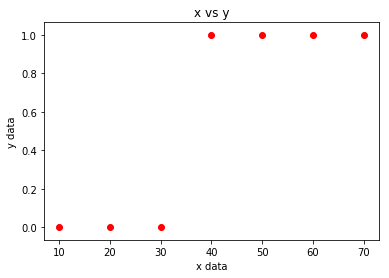

In [42]:
plt.scatter(x, y, color = 'red') 
plt.title('x vs y')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def linRG(x, theta):
    return np.dot(theta, x.T)

def predict(X, theta):
  z = linRG(X, theta)
  return sigmoid(z)

In [44]:
def gradient(x, h, y):
    '''
    #     return (1 / n) * np.dot(x.T, h - y)
    #compute partial derivative for  all( each time ith X (i.e. x1) in each row ) column. to find all thetas gradient. then average.
    #for i=0, X=all rows ith column. this gives a column matrix. where (h-y) is a row matrix.
    '''
    n = x.shape[0]
    return (1 / n) * np.dot( (h - y), X)

def gradient_man(x, h, y):
    '''compute manually. worked!
    '''
    gds=[]
    for icol in range( x.shape[1] ):
#         gd=np.dot( (h-y), x[:,icol])
#         print('gd=',gd)
        gd=0
        for irow in range(x.shape[0]):
            gd+=(h[irow]-y[irow]) *x[irow][icol]
        gda=gd/x.shape[0]
        gds.append(gda)
    
    return gds

def loss(h, y):
    return (- y * np.log(h) - (1 - y ) * np.log(1 - h) ).mean()

In [45]:
#Testing Gradient Function
theta = np.array([1,2])
z = linRG(X, theta)
print(z)
h=sigmoid(z) 
print(h)

gd=gradient(X, h, y)
print(gd)

[ 21.  41.  61.  81. 101. 121. 141.]
[1. 1. 1. 1. 1. 1. 1.]
[0.42857143 8.57142857]


In [46]:
# weights initialization
theta = np.zeros(2)
print(theta)

[0. 0.]


In [47]:
epoch=90000
# epoch=40
lr=0.1
# lr=0.01
cost_history=[]

print('training started')
for i in range(epoch):
    h=predict(X, theta) 
    cost=loss(h,y)
    gd=gradient(X, h, y)
#     gd2=gradient_man(X,h,y)
    theta = theta-lr * gd
    
    cost_history.append(cost)
    
#     if i % 10000 == 0:
#         print("iter: "+str(i) + " cost: "+str(cost))

print('training completed')

training started


C:\Python37\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Python37\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


training completed


In [48]:
print(theta)

[-29.28835743   0.84097994]


In [49]:
print(X)
print(X[0,0])
print(X[:,0])

[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]]
1.0
[1. 1. 1. 1. 1. 1. 1.]


In [50]:
pd=predict(X, theta)
print(pd) 

[8.56165004e-10 3.84490213e-06 1.69738945e-02 9.87268217e-01
 9.99997128e-01 9.99999999e-01 1.00000000e+00]


In [51]:
# for ipd in pd:
# #     print( ipd.round()  )
#     if ipd > 0.5:
#         print(1)
#     else:
#         print(0)
prd=[ 1 if ipd>0.5 else 0 for ipd in pd]
print(prd)

[0, 0, 0, 1, 1, 1, 1]


In [52]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [53]:
accuracy(prd, y)

1.0

In [19]:
#Prediction for new data.
nx=np.array((1, 15))
fp=predict(nx, theta)
print(fp , fp.round())

5.737493292839326e-08 0.0


In [20]:
print(cost_history[:10])

[0.6931471805599453, nan, 2.4424634306924244, 17.718350615552108, nan, nan, nan, 0.6135692171075535, nan, 0.5677908066351388]


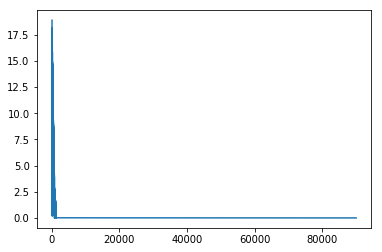

In [21]:
# npt=90000
npt=epoch
plt.plot(cost_history)
plt.show()

### Evaluation

In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [23]:
results = confusion_matrix(y, prd) 
print(results)

[[3 0]
 [0 4]]


In [24]:
print( classification_report(y, prd) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



### Logistic Regression Algorithm



#Training

epoch=50000

lr=0.1

theta=np.array([0, 0])

for i in range(epoch):

	z=linearRegression(X, theta)
    
	predict=sigmoid(z)
    
	gd=gradient(predict, y, X)
    
	theta=theta- lr*gd


#You can now print the theta

#Prediction on Training data with the traind theta values.

z=linearRegression(X, theta)

pd=sigmoid(z)

In [49]:
#calculating decision boundary line.
yy=[]
for i in x:
    cy=theta[0]+theta[1]*i
#     cy=sigmoid(cy)
    if cy>2:
        cy=2
    elif cy<-2:
        cy=-2
    yy.append(cy)

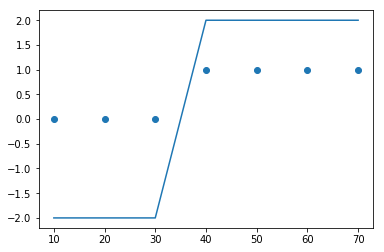

In [50]:
plt.scatter(x,y)  
# plt.plot(px, sigmoid(np.array(py)) )  
plt.plot(x,yy)
plt.show()

#### Expreriment.

In [29]:
def get_thd(th, pd):
    prd=[ 1 if ipd>th else 0 for ipd in pd]
    return prd

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [31]:
y
prd

[0, 0, 0, 1, 1, 1, 1]

In [32]:
get_thd(0.3, pd)

[0, 0, 0, 1, 1, 1, 1]

In [35]:
get_thd(0.9, pd)

[0, 0, 0, 1, 1, 1, 1]